## Observations and Insights 

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
mice_count=len(data_complete["Mouse ID"])
print(mice_count)

1893


In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_complete.duplicated("Mouse ID")

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [36]:
# Optional: Get all the data for the duplicate mouse ID.

In [151]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned = data_complete.drop_duplicates("Mouse ID")
data_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [44]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count=len(data_cleaned)-1
print(clean_mice_count)

248


## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Used complete DF not cleaned.. is this correct?
#Do we have to do both methods of creating a summary stats table??
#brackets because accessing something in a data frame
mean_tumor_volume=data_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_volume=data_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor_volume=data_complete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdev_tumor_volume=data_complete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor_volume=data_complete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats=pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                            "Median Tumor Volume": median_tumor_volume,
                            "Tumor Volume Variance": variance_tumor_volume,
                            "Tumor Volume Standard Deviation": stdev_tumor_volume,
                            "Tumor Volume Standard Error": sem_tumor_volume})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

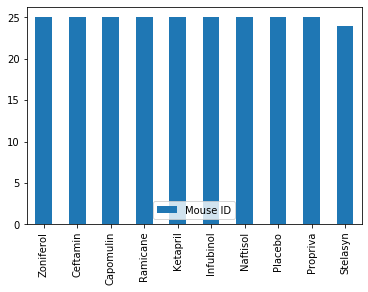

In [107]:
# PANDAS: Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
drug = data_complete["Drug Regimen"].unique()
mice = mouse_metadata["Drug Regimen"].value_counts()

bar_chart = ({"Drug Regimen": drug, "Mouse ID": mice})

bar_chart_df = pd.DataFrame(bar_chart)
bar_chart_df
bar_chart_df.plot.bar()

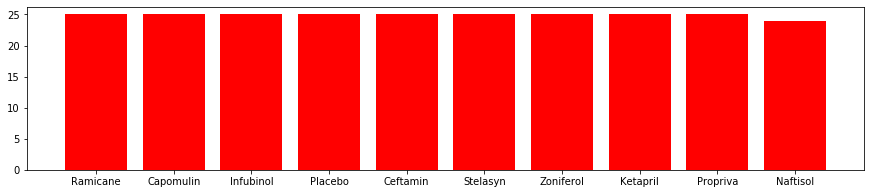

In [108]:
# PYPLOT: Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(15,3))
plt.bar(drug, mice, color="red", align="center")
plt.show()

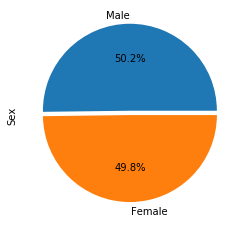

In [133]:
# PANDAS: Generate a pie plot showing the distribution of female versus male mice using pandas
gender_breakdown = data_cleaned["Sex"].value_counts()
gender_breakdown

gender_breakdown.plot.pie(y="Sex", explode=explode, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fe16cf09d50>,
 [Text(-0.007254593066618643, 1.1499771175460136, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0041004221680887975, 0.649987066439051, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

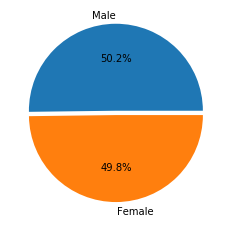

In [123]:
#PYPLOT: Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
explode=(.05,0)
plt.pie(gender_breakdown, explode=explode, labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#to_frame() converts from string to DF
mouse_timepoint=data_complete.groupby(["Mouse ID"])["Timepoint"].max().to_frame()
mouse_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_volume = pd.merge(data_complete, mouse_timepoint, on=["Timepoint", "Mouse ID"])
last_timepoint_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [188]:
# Put treatments into a list for for loop (and later for plot labels)
#Capomulin, Ramicane, Infubinol, Ceftamin
treatment_list=["Capomulin," "Ramicane", "Infubinol", "Ceftamin"]

#Empty list for tumor volume data
tumor_volume_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_timepoint_volume=data_complete.loc[data_complete["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(last_timepoint_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles=last_timepoint_volume.quantile([.25, .5, .75])
    lower_quartile=quartiles[.25]
    upper_quartile=quartiles[.5]
    iqr=upper_quartile-lower_quartile
    lower_bound=lower_quartile-(1.5*iqr)
    upper_bound=upper_quartile-(1.5*iqr)
    outliers=last_timepoint_volume.loc[(last_timepoint_volume < lower_bound) | (last_timepoint_volume > upper_bound)]
    print(f"Outliers for {drug}: {outliers}")

Outliers for Capomulin,Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 455     48.508468
456     51.852437
457     52.777870
458     55.173336
459     56.793208
          ...    
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Volume (mm3), Length: 153, dtype: float64
Outliers for Ceftamin: 484     45.000000
485     46.795257
486     47.371343
487     49.734404
488     50.513437
          ...    
1851    57.173538
1852    59.033275
1853    61.153140
1854    63.469549
1855    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64


In [190]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
last_timepoint_volume=last_timepoint_volume.reset_index()
boxplot=last_timepoint_volume.boxplot
#Sample code from https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html
# fig1, ax1 = plt.subplots()
# ax1.set_title('Basic Plot')
# ax1.boxplot(data)

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
##Example from 5.2 Stu_Plots_Review
#  plt.title("Sin from 0 to 2$\pi$")
# plt.xlabel("Real Numbers from 0 to 2$\pi$")
# plt.ylabel("sin(x)")

# plt.hlines(0, 0, x_lim, alpha=0.2)
# plt.xlim(0, x_lim)
# plt.ylim(-1.25, 1.25)

# plt.plot(x_axis, sin, marker="o", color="red", linewidth=1)
# plt.show()

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
##Sample code from 5.2 Stu_Plots_Review
#  plt.title("Running Time of FakeSort for Sample Input Sizes")
# plt.xlabel("Length of Input Array")
# plt.ylabel("Time to Sort (s)")

# plt.scatter(x_axis, times, marker="o", color="red")
# plt.show()

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
    #USE Summary Stats Table made earlier! and merge with a DF that has mouse weight?
#Sample code from 5.3 Correlation Conundrum:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"

# income = who_data.iloc[:,1]
# alcohol = who_data.iloc[:,8]
# correlation = st.pearsonr(income,alcohol)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

#Sample code from 5.3 Ins_Fits_and Regression
#First Plot out rooms versus median house price
# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
#Then Add the linear regression equation and line to plot
# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
